In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [4]:
file_path = "Dataset2"

In [5]:
name_class = os.listdir(file_path)
name_class

['Kirti',
 'Krithi_left',
 'Rajashi Dond',
 'Rajashri Dond_left',
 'Urmila',
 'Urmila_left']

In [6]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [7]:
filepaths

['Dataset2\\Kirti\\IMG20231218141028.jpg',
 'Dataset2\\Kirti\\IMG20231218141038.jpg',
 'Dataset2\\Kirti\\IMG20231218141039.jpg',
 'Dataset2\\Kirti\\IMG20231218141041.jpg',
 'Dataset2\\Kirti\\IMG20231218141043.jpg',
 'Dataset2\\Kirti\\IMG20231218141045.jpg',
 'Dataset2\\Kirti\\IMG20231218141047.jpg',
 'Dataset2\\Kirti\\IMG20231218141048.jpg',
 'Dataset2\\Kirti\\IMG20231218141052.jpg',
 'Dataset2\\Kirti\\IMG20231218141053.jpg',
 'Dataset2\\Kirti\\IMG20231218141055.jpg',
 'Dataset2\\Kirti\\IMG20231218141056.jpg',
 'Dataset2\\Kirti\\IMG20231218141115.jpg',
 'Dataset2\\Kirti\\IMG20231218141117.jpg',
 'Dataset2\\Kirti\\IMG20231218141119.jpg',
 'Dataset2\\Kirti\\IMG20231218141122.jpg',
 'Dataset2\\Kirti\\IMG20231218141123.jpg',
 'Dataset2\\Kirti\\IMG20231218141124.jpg',
 'Dataset2\\Kirti\\IMG20231218141126.jpg',
 'Dataset2\\Kirti\\IMG20231218141133.jpg',
 'Dataset2\\Kirti\\IMG20231218141135.jpg',
 'Dataset2\\Kirti\\IMG20231218141140.jpg',
 'Dataset2\\Kirti\\IMG20231218141141.jpg',
 'Dataset2\

In [8]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',
 'Kirti',


In [9]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(100)


,Filepath,Label
0,Dataset2\Rajashi Dond\IMG_20231218_142307.jpg,Rajashi Dond
1,Dataset2\Rajashi Dond\IMG_20231218_142827.jpg,Rajashi Dond
2,Dataset2\Urmila\20231218_120925.jpg,Urmila
3,Dataset2\Krithi_left\IMG20231218140812.jpg,Krithi_left
4,Dataset2\Kirti\IMG20231218142036.jpg,Kirti
...,...,...
95,Dataset2\Kirti\IMG20231218141645.jpg,Kirti
96,Dataset2\Urmila\20231218_121414(0).jpg,Urmila
97,Dataset2\Urmila_left\20231217_145348.jpg,Urmila_left
98,Dataset2\Krithi_left\IMG20231218142636.jpg,Krithi_left


In [10]:
#balancing

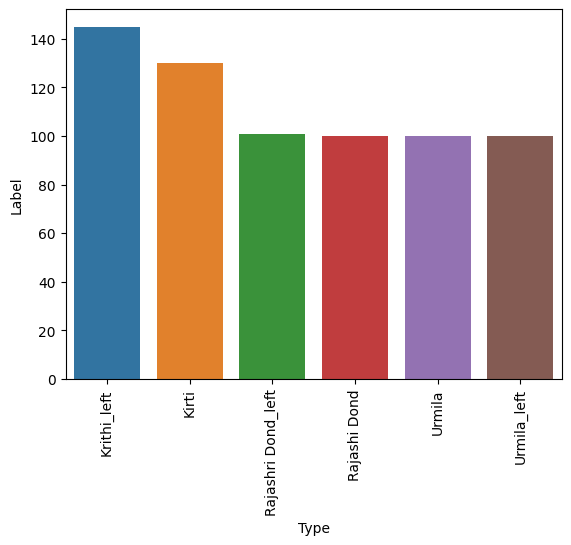

In [11]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [12]:
#balance by deleting extra images (Augmentor API)
#augmentation 
#GAN

In [15]:
train, test = train_test_split(data, test_size=0.10, random_state=42)

In [16]:
test, val= train_test_split(test, test_size=0.50, random_state=42)

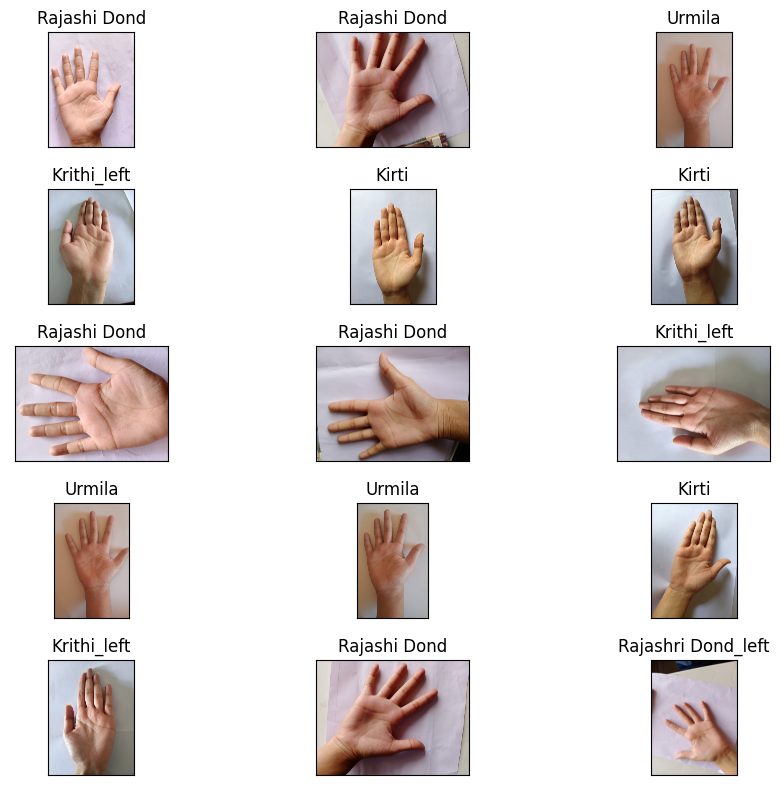

In [17]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [20]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [21]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 608 validated image filenames belonging to 6 classes.
Found 34 validated image filenames belonging to 6 classes.
Found 34 validated image filenames belonging to 6 classes.


In [22]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [24]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [25]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=50
)

Epoch 1/50
19/19 [==============================] - 183s 9s/step - loss: 0.8444 - accuracy: 0.6776 - val_loss: 0.1873 - val_accuracy: 0.9412
Epoch 2/50
19/19 [==============================] - 169s 9s/step - loss: 0.2183 - accuracy: 0.9145 - val_loss: 0.0820 - val_accuracy: 0.9706
Epoch 3/50
19/19 [==============================] - 164s 9s/step - loss: 0.0945 - accuracy: 0.9720 - val_loss: 0.0351 - val_accuracy: 1.0000
Epoch 4/50
19/19 [==============================] - 168s 9s/step - loss: 0.0376 - accuracy: 0.9901 - val_loss: 0.0428 - val_accuracy: 0.9706
Epoch 5/50
19/19 [==============================] - 167s 9s/step - loss: 0.0259 - accuracy: 0.9934 - val_loss: 0.0425 - val_accuracy: 0.9706
Epoch 6/50
19/19 [==============================] - 162s 8s/step - loss: 0.0143 - accuracy: 0.9984 - val_loss: 0.0453 - val_accuracy: 0.9706
Epoch 7/50
19/19 [==============================] - 163s 9s/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0315 - val_accuracy: 0.9706
Epoch 8/50
19

In [ ]:
model.save("model_palm_classification.h5")  

In [61]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

NameError: name 'history' is not defined

In [62]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[32,16] labels_size=[32,7]
	 [[node categorical_crossentropy/softmax_cross_entropy_with_logits (defined at \AppData\Local\Temp\ipykernel_27700\3911842319.py:4) ]] [Op:__inference_test_function_26237]

Function call stack:
test_function


In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
loaded_model_imageNet = load_model("model_palm_classification.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions